In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from livelossplot import PlotLossesKerasTF
from tensorflow.keras.callbacks import TensorBoard

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


# Loading processed batched data

In [6]:
train = tf.data.Dataset.load("train_ds")
val = tf.data.Dataset.load("val_ds")
#test = tf.data.Dataset.load("test_ds")

# Building model

In [26]:
#Hyperparameters

lr = 0.0005 #learning rate
opt = Adam(learning_rate=lr)

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_18 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 128)      

# Training model

In [27]:
epochs = 20
model_file_name = "model_weights.h5"

checkpoint = ModelCheckpoint(model_file_name, monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.001, mode='auto')


log_file_name = 'fer_mod'
tensorboard = TensorBoard(log_dir = "logs\\{}".format(log_file_name))

callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr, tensorboard]

#To launch Tensorboard
#Go to the current directory cd Desktop/folder
#python -m tensorboard.main --logdir=logs/ 

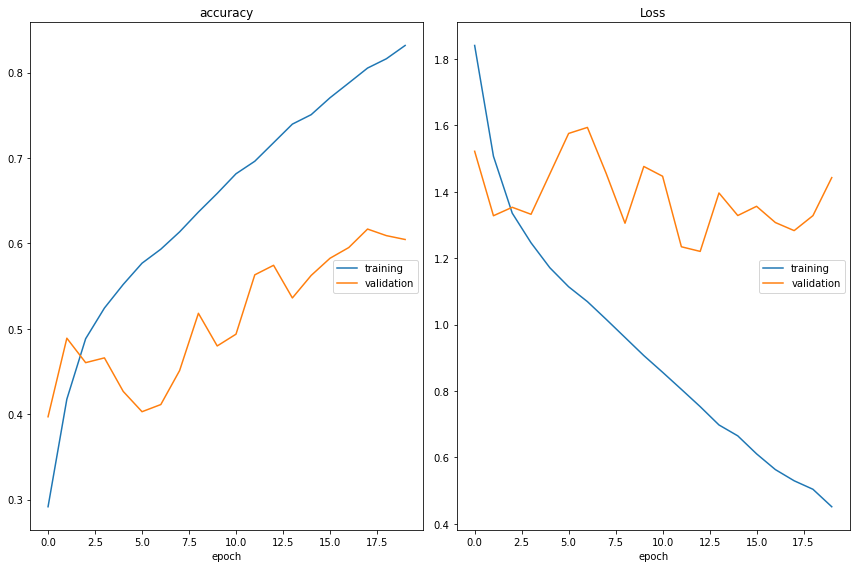

accuracy
	training         	 (min:    0.292, max:    0.832, cur:    0.832)
	validation       	 (min:    0.397, max:    0.617, cur:    0.605)
Loss
	training         	 (min:    0.451, max:    1.841, cur:    0.451)
	validation       	 (min:    1.220, max:    1.594, cur:    1.443)

Epoch 20: saving model to model_weights.h5
718/718 [==============================] - 798s 1s/step - loss: 0.4511 - accuracy: 0.8318 - val_loss: 1.4425 - val_accuracy: 0.6046 - lr: 5.0000e-04


In [28]:
hist = model.fit(train, 
                 epochs=epochs, 
                 validation_data=val,
                callbacks = callbacks)

# Saving model architecture

In [29]:
model_structure = model.to_json()
with open("model_structure.json", "w") as json_file:
    json_file.write(model_structure)
    
#model.save_weights("model.h5") #Weights are already saved during training, but just in case